In [50]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyod

from sklearn.preprocessing import StandardScaler

from sklearn.manifold import Isomap
from sklearn.manifold import TSNE

from sklearn.decomposition import PCA

In [86]:
df = pd.read_csv('tabular/tracks_unduplicated.csv', skipinitialspace=True)

In [52]:
df.columns

Index(['name', 'duration_ms', 'explicit', 'popularity', 'artists',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'tempo_confidence', 'time_signature_confidence',
       'key_confidence', 'mode_confidence', 'genre', 'id'],
      dtype='object')

In [53]:
X = df.drop(columns=['name', 'explicit', 'artists', 'id','genre']).values
y = df["genre"].values

In [54]:
X.shape

(84547, 18)

In [55]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X

array([[ 0.58102272,  0.91866091, -0.1577313 , ...,  0.57211195,
         0.03536266,  0.07891681],
       [ 2.98567519,  0.5829351 ,  1.07267087, ..., -2.4980273 ,
        -0.32663013,  0.42828301],
       [ 0.32698508,  0.29517011,  1.36051725, ..., -1.90130884,
         1.66030807,  1.36174582],
       ...,
       [-0.33372158,  2.26156419,  1.42824581, ...,  0.52656092,
        -1.5855606 , -0.98555833],
       [-0.20954968,  1.30234756,  0.52519834, ...,  0.57211195,
         0.21635906,  0.51016571],
       [-0.26631398,  1.15846507,  1.17426371, ...,  0.57211195,
         1.43104597,  1.08880348]])

In [56]:
X.shape

(84547, 18)

In [57]:
y.shape

(84547,)

In [58]:
list_of_ol = []

# DimRed models

### PCA

In [59]:
pca = PCA(n_components=2)
pca.fit(X)
X_dim_red = pca.transform(X)

### plotta

In [60]:
def plotta(scores):
    
    #find 1% top outliers
    k = 845
    thr = np.partition(scores, -k)[-k]
    outliers = scores > thr
    list_of_ol.append(outliers)
    
    # Definisci la dimensione della figura
    plt.figure(figsize=(10, 4))

    # Plot del primo grafico (istogramma)
    plt.subplot(1, 2, 1)
    plt.hist(scores)
    plt.axvline(np.min(scores[np.where(outliers==1)]), c='k')

    # Plot del secondo grafico (scatter plot)
    plt.subplot(1, 2, 2)
    plt.scatter(X_dim_red[:, 0], X_dim_red[:, 1], c=outliers, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)

    # Mostra i grafici
    plt.tight_layout()
    plt.show()

# HBOS (visual approach)

In [61]:
from pyod.models.hbos import HBOS

In [62]:
clf = HBOS()
clf.fit(X)

HBOS(alpha=0.1, contamination=0.1, n_bins=10, tol=0.5)

In [63]:
scores = clf.decision_scores_

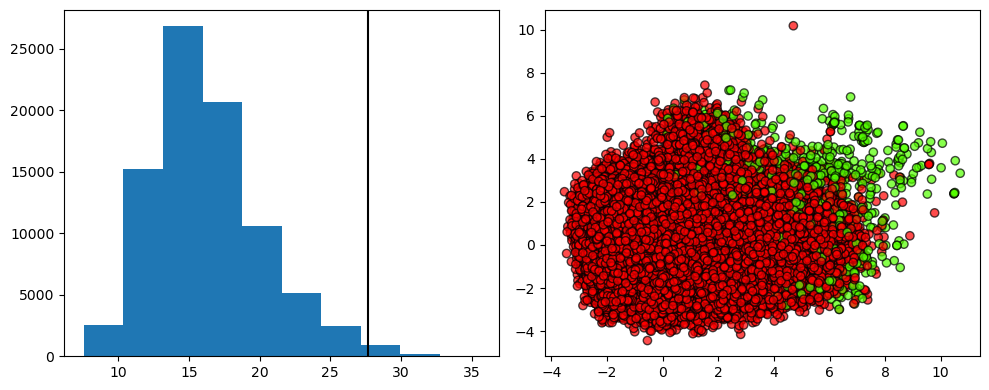

In [64]:
plotta(scores)

# KNN

In [65]:
from pyod.models.knn import KNN

In [66]:
clf = KNN(n_neighbors=5)
clf.fit(X)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

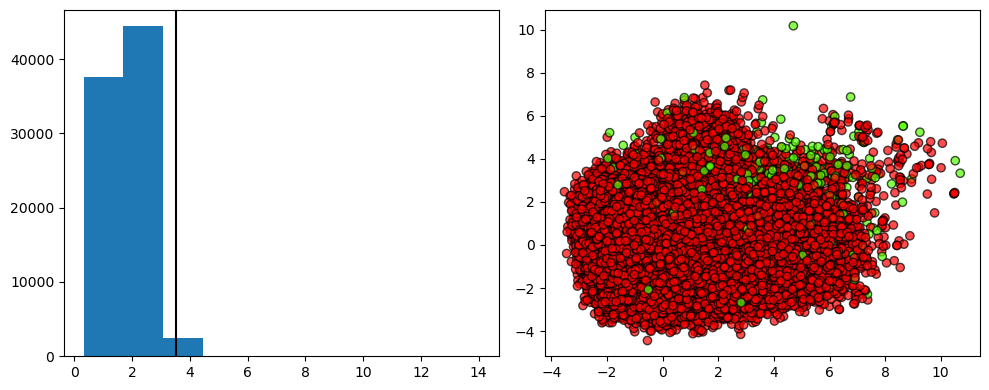

In [67]:
scores = clf.decision_scores_
plotta(scores)

# CBLOF (clustering approach)

In [68]:
from pyod.models.cblof import CBLOF

In [69]:
clf = CBLOF()
clf.fit(X)

C:\Users\fabio\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.1, n_clusters=8, n_jobs=None, random_state=None,
   use_weights=False)

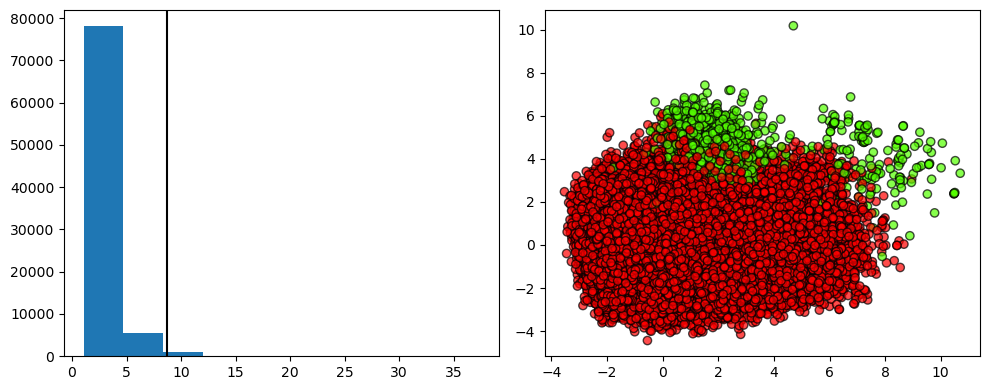

In [70]:
scores = clf.decision_scores_
plotta(scores)

# LODA (ensemble approach)

In [71]:
from pyod.models.loda import LODA

In [72]:
clf = LODA()
clf.fit(X)

LODA(contamination=0.1, n_bins=10, n_random_cuts=100)

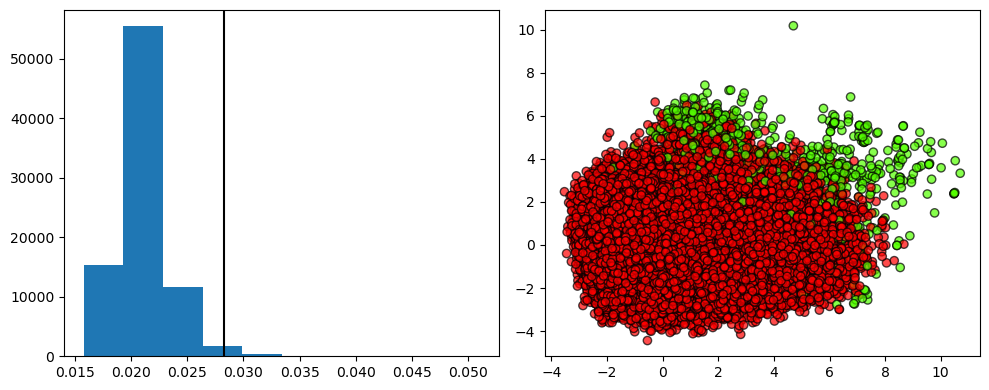

In [73]:
scores = clf.decision_scores_
plotta(scores)

# Isolation Forests (model approach)

In [74]:
from pyod.models.iforest import IForest

In [75]:
clf = IForest()
clf.fit(X)

IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

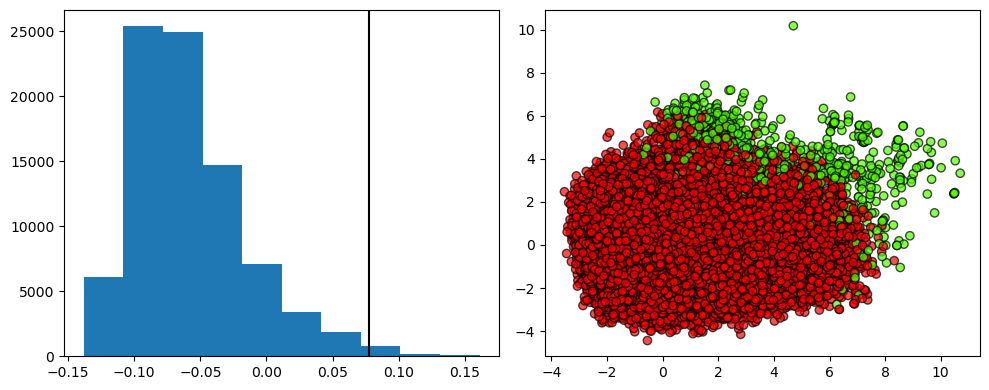

In [76]:
scores = clf.decision_scores_
plotta(scores)

## Intersezione tra i 5 metodi

In [77]:
list_of_ol = [list(x) for x in list_of_ol]

47


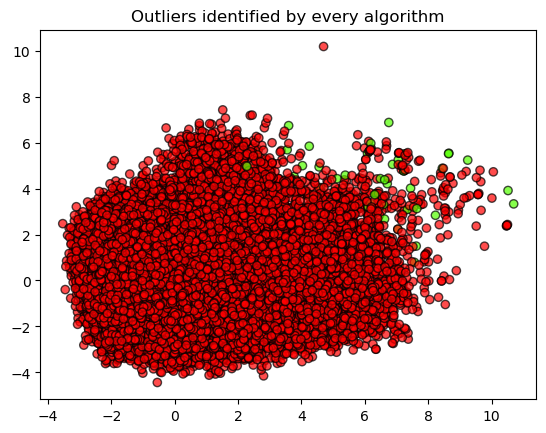

In [78]:
c = 0
inters_list = []
for i in range(0, len(list_of_ol[0])):
    if list_of_ol[0][i] == True and list_of_ol[1][i] == True and list_of_ol[2][i] == True and list_of_ol[3][i] == True and list_of_ol[4][i] == True:
        inters_list.append(True)
        c+=1
    else:
        inters_list.append(False)
print(c)

plt.scatter(X_dim_red[:, 0], X_dim_red[:, 1], c=inters_list, 
        cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.title("Outliers identified by every algorithm")
plt.show()

## Unione tra i 5 metodi

2298


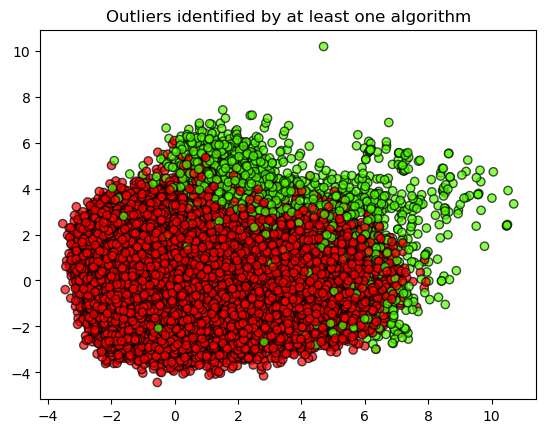

In [79]:
c = 0
inters_list = []
for i in range(0, len(list_of_ol[0])):
    if list_of_ol[0][i] == True or list_of_ol[1][i] == True or list_of_ol[2][i] == True or list_of_ol[3][i] == True or list_of_ol[4][i] == True:
        inters_list.append(True)
        c+=1
    else:
        inters_list.append(False)
print(c)

plt.scatter(X_dim_red[:, 0], X_dim_red[:, 1], c=inters_list, 
        cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.title("Outliers identified by at least one algorithm")
plt.show()

## Eliminazione di record che risultano outlier per almeno 3 metodi

594


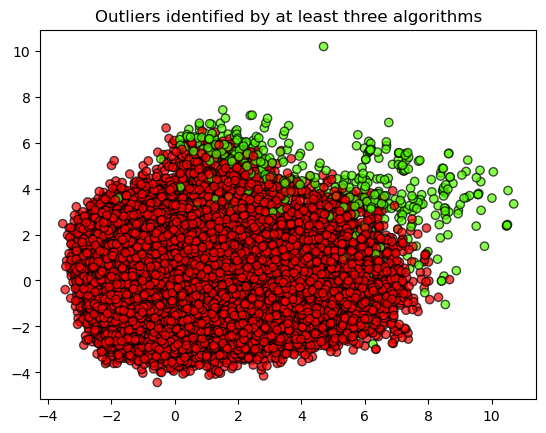

In [80]:
c = 0
inters_list = []

for i in range(0, len(list_of_ol[0])):
    if [sublist[i] for sublist in list_of_ol].count(True) > 2:
        inters_list.append(True)
        c+=1
    else:
        inters_list.append(False)
print(c)

plt.scatter(X_dim_red[:, 0], X_dim_red[:, 1], c=inters_list, 
        cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.title("Outliers identified by at least three algorithms")
plt.show()

# Final dataset export

In [87]:
df_export = pd.read_csv('tabular/tracks_unduplicated.csv', skipinitialspace=True)

In [88]:
len(inters_list)

84547

In [89]:
df_export = df[~pd.Series(inters_list)]

In [90]:
df_export

,name,duration_ms,explicit,popularity,artists,danceability,energy,key,loudness,mode,...,liveness,valence,tempo,time_signature,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,genre,id
0,Grey,290479,False,52,Kölsch,0.532,0.517,0,-9.846,1,...,0.0854,0.2390,186.001,3,0.020,1.000,0.500,0.525,minimal-techno,4rjA5kJJWbwU1prXCvg6Fk
1,Thrown,539229,False,45,Kiasmos,0.750,0.340,5,-12.759,0,...,0.1060,0.1450,120.016,4,0.678,0.326,0.410,0.589,minimal-techno,6xzpUzzIquIyUzTLbbgSdI
2,Routine,264200,False,39,Joris Delacroix,0.801,0.639,7,-10.681,0,...,0.0688,0.3200,118.052,3,0.847,0.457,0.904,0.760,minimal-techno,56tXgHlSHCfgmGhwVXNizc
3,Confronted - Anfisa Letyago Stranger Remix,387413,False,0,Pan-Pot;Anfisa Letyago,0.675,0.543,6,-11.983,0,...,0.1120,0.0374,128.990,4,0.882,0.498,0.512,0.503,minimal-techno,0s3wIBczp6TdSJ2y8cveJl
4,Jupiter Sunrise,248956,False,0,Kollektiv Turmstrasse,0.761,0.671,11,-13.346,0,...,0.1150,0.1190,120.003,4,0.882,1.000,0.474,0.459,minimal-techno,4PSbDDd1LRYMhqPXvza6I2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84542,I'm Good (Blue) - REAPER Extended Remix,209655,True,23,David Guetta;Bebe Rexha;REAPER,0.466,0.982,5,-2.674,0,...,0.3580,0.3700,173.958,4,0.729,1.000,0.088,0.182,edm,0wiDjWz3U1WfwXSrWHXe2b
84543,End Of The Night,205724,True,56,Danny Avila,0.666,0.720,9,-4.483,1,...,0.0793,0.3120,99.970,4,0.712,1.000,0.395,0.535,edm,46n9OJc7LOIVdj8t2l5WA5
84544,Sexy Bitch (feat. Akon),195853,True,80,David Guetta;Akon,0.813,0.627,11,-5.018,0,...,0.1310,0.8010,130.011,4,0.814,0.990,0.097,0.330,edm,127uq83uGFapbddqiMUKky
84545,Savannah,208698,False,60,Diviners;Philly K.,0.653,0.779,0,-3.133,1,...,0.0392,0.3870,108.074,4,0.650,1.000,0.545,0.604,edm,0ZdUHFxifUJNqo7G4aJzoF


In [94]:

df_export_not_norm = df.iloc[df_export.index]

In [98]:
df_export_not_norm.to_csv('final_tracks.csv', index=False)